<a href="https://colab.research.google.com/github/viniciusrpb/visexp_irony/blob/master/irony_tweet_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

### Function for plotting the confusion matrix

In [2]:
def plotConfusionMatrix(classifier,X_test,y_test,y_pred,class_names):
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, X_test, y_test,display_labels=class_names,cmap=plt.cm.Blues)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    return ;

#### Read the csv file of the tweets set

In [3]:
path_tweet_set = 'SemEval2018-T3-train-taskA.txt'

corpus_tweets = pd.read_csv(path_tweet_set,encoding="utf8",sep='\t')

labels = corpus_tweets['Label'].unique()

print(corpus_tweets.shape)

print(corpus_tweets.head())

print(labels)

(3817, 3)
   Tweet index  Label                                         Tweet text
0            1      1  Sweet United Nations video. Just in time for C...
1            2      1  @mrdahl87 We are rumored to have talked to Erv...
2            3      1  Hey there! Nice to see you Minnesota/ND Winter...
3            4      0                3 episodes left I'm dying over here
4            5      1  I can't breathe! was chosen as the most notabl...
[1 0]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(corpus_tweets['Tweet text'],corpus_tweets['Label'], test_size=0.4, random_state=0)

In [5]:
vectorizer = TfidfVectorizer(norm="l1", stop_words="english",max_df=0.95, min_df=2)
vectorizer.fit(X_train)

print(vectorizer.get_feature_names())
#print(tfidf.shape)

['00', '10', '100', '1000', '11', '12', '13', '14', '15', '16', '17', '19', '1_free_man', '1am', '20', '200', '2014', '2014mama', '2015', '21', '21st', '25', '2667ms1bhz', '2a', '2am', '2nd', '30', '30am', '35', '3am', '40', '4am', '4th', '50', '500', '5am', '600', '8ftstaota1', '99', '9am', '___', 'aap', 'aaron', 'ab', 'abdullah', 'ability', 'able', 'abpt_rocket', 'absolutely', 'absolutetosh', 'abt', 'academic', 'accepting', 'accessory', 'accidentally', 'account', 'accounting', 'accounts', 'accuse', 'act', 'action', 'actions', 'actor', 'actually', 'add', 'added', 'adorable', 'adult', 'adults', 'advancedwarfare', 'advice', 'af', 'affiliate', 'afford', 'afraid', 'afternoon', 'ago', 'agree', 'ah', 'ahead', 'ahhh', 'ain', 'airplane', 'airport', 'aka', 'alabama', 'album', 'alcohol', 'alert', 'alive', 'allah', 'allowed', 'alot', 'amaliearena', 'amazing', 'amazingly', 'ambulance', 'amen', 'amendment', 'america', 'american', 'americans', 'anan_vii', 'angry', 'annoying', 'anonymous', 'answer',

#### Split dataset into training and test sets

In [10]:
tfidf_train = vectorizer.transform(X_train)
tfidf_test = vectorizer.transform(X_test)

#### Classification by means of Support Vector Machine

              precision    recall  f1-score   support

           0       0.58      0.59      0.58       758
           1       0.59      0.58      0.58       769

    accuracy                           0.58      1527
   macro avg       0.58      0.58      0.58      1527
weighted avg       0.58      0.58      0.58      1527

Confusion matrix for MLP: 
[[444 314]
 [323 446]]
Confusion matrix, without normalization
[[444 314]
 [323 446]]
Normalized confusion matrix
[[444 314]
 [323 446]]


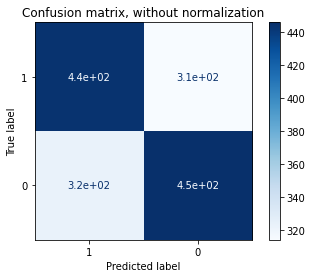

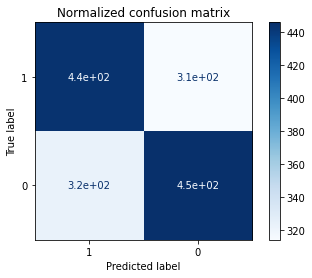

In [7]:
svm_clf = SVC(kernel='rbf',gamma=0.25,C=1000)

svm_clf.fit(tfidf_train, y_train)
y_true, y_pred = y_test, svm_clf.predict(tfidf_test)

print(classification_report(y_true, y_pred))
print("Confusion matrix for SVM: ")
print(confusion_matrix(y_true, y_pred))

plotConfusionMatrix(svm_clf,tfidf_test,y_test,y_pred,labels)

#### Classification by means of Artificial Neural Network: Feed-forward Backpropagation Multilayer Perceptron

Detailed classification report for MLP: 
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       758
           1       0.59      0.55      0.57       769

    accuracy                           0.58      1527
   macro avg       0.58      0.58      0.58      1527
weighted avg       0.58      0.58      0.58      1527

Confusion matrix for MLP: 
[[469 289]
 [346 423]]
Confusion matrix, without normalization
[[469 289]
 [346 423]]
Normalized confusion matrix
[[469 289]
 [346 423]]


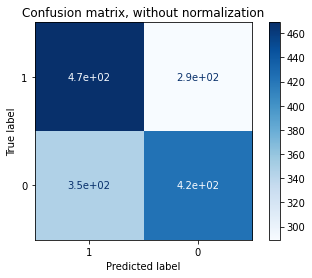

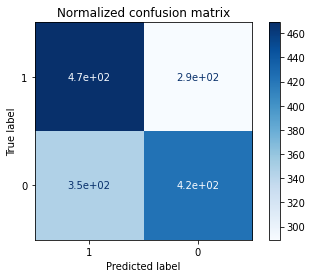

In [8]:
mlp_clf = MLPClassifier(hidden_layer_sizes= {3,3}, activation= "tanh",learning_rate_init = 0.5, max_iter= 1100, solver= 'adam')
mlp_clf.fit(tfidf_train, y_train)
print("Detailed classification report for MLP: ")
y_true, y_pred = y_test, mlp_clf.predict(tfidf_test)
print(classification_report(y_true, y_pred))
print("Confusion matrix for MLP: ")
print(confusion_matrix(y_true, y_pred))

plotConfusionMatrix(mlp_clf,tfidf_test,y_test,y_pred,labels)

#### Naive Bayes Classification

Detailed classification report for Naive Bayes: 
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       758
           1       0.62      0.62      0.62       769

    accuracy                           0.61      1527
   macro avg       0.61      0.61      0.61      1527
weighted avg       0.61      0.61      0.61      1527

Confusion matrix for Naive Bayes: 
[[459 299]
 [290 479]]
Confusion matrix, without normalization
[[459 299]
 [290 479]]
Normalized confusion matrix
[[459 299]
 [290 479]]


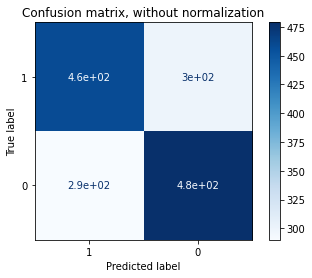

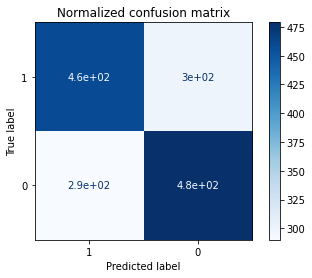

In [11]:
gnb_clf = MultinomialNB()
gnb_clf.fit(tfidf_train, y_train)
y_pred = gnb_clf.predict(tfidf_test)
print("Detailed classification report for Naive Bayes: ")
print(classification_report(y_test, y_pred))
print("Confusion matrix for Naive Bayes: ")
print(confusion_matrix(y_true, y_pred))

plotConfusionMatrix(gnb_clf,tfidf_test,y_test,y_pred,labels)

### Randon forest classifier

In [ ]:
rfc_clf = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 
rfc_clf.fit(X_train, y_train)
y_pred = rfc_clf.predict(X_test)
print("Detailed classification report for Randon Forest: ")
print(classification_report(y_test, y_pred))
print("Confusion matrix for Randon Forest: ")
print(confusion_matrix(y_test, y_pred))
plotConfusionMatrix(rfc_clf,X_test,y_test,y_pred,labels)